# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%***********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [24]:
# difference in stock price
df["Diff"] = df["Adj Close"].diff().shift(-1)

# target up or down
df["Target"] = np.sign(df["Diff"])

# option premium
df["Premium"] = 0.08 * df["Adj Close"]

df.head()


,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006910,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [26]:
X = pd.read_csv("Lab2_Xdata.csv", index_col="Date", parse_dates=["Date"])

In [27]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30",:].copy()

In [28]:
logreg = LogisticRegression()

logreg.fit(X, y)

y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [29]:
df["Predictions"] = y_pred

In [30]:
df["Profits"] = 0

# true positives
df.loc[(df["Predictions"] == 1) & (df["Target"] == 1), "Profits"] = df["Premium"]

# false positives
df.loc[(df["Predictions"] == 1) & (df["Target"] == -1), "Profits"] = 100 * df["Diff"] + df["Premium"]

In [31]:
df

,Adj Close,Diff,Target,Premium,Predictions,Profits
Date,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0.000000
1981-01-31,0.097591,-0.006045,-1.0,0.007807,-1.0,0.000000
1981-02-28,0.091546,-0.006910,-1.0,0.007324,-1.0,0.000000
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0.007842
...,...,...,...,...,...,...
2023-05-31,176.778076,16.675476,1.0,14.142246,1.0,14.142246
2023-06-30,193.453552,2.473404,1.0,15.476284,1.0,15.476284
2023-07-31,195.926956,-8.304138,-1.0,15.674156,-1.0,0.000000


# 5.) Plot profits over time

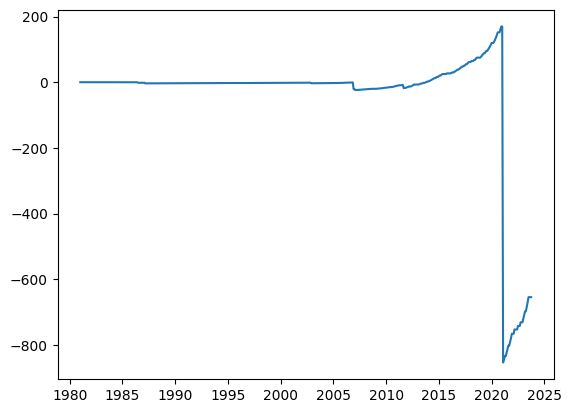

In [32]:
plt.plot(np.cumsum(df["Profits"]))
plt.show()

# 5.5.) My MQE Skills to Help Mr. Liu's Ventures

A word analysis of StarArena's posts can identify which cryptocurrencies or blockchain topics are generating the most interest.

A regression could show how interaction on the platform changes as the market price of of its tokens change.

Volatility (or anticipated volatilty) in the broader crypto and U.S. equity markets may change how users spend money on the platform.

Understanding which actions are driving profit and how to encourage different behaviors on the app through changed incentives or new features.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.